In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, callbacks

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D

In [19]:
#load mnist data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [20]:
#normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [21]:
#reshape images to 4 dim
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

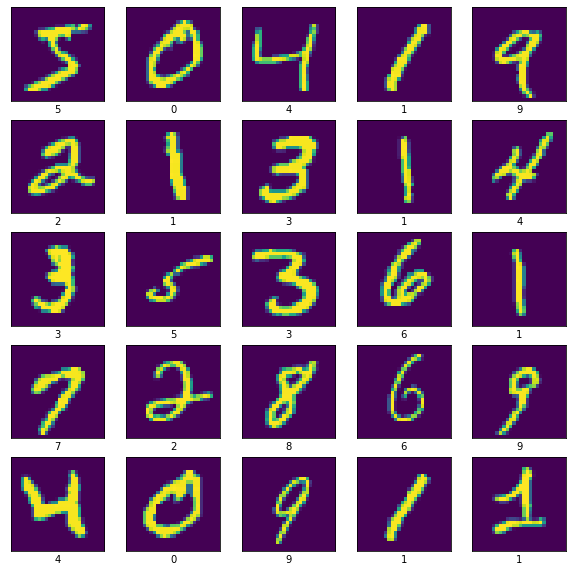

In [22]:
#plot images of digits dataset
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [29]:
#define convolutional neural network function
def mnist_cnn():
    
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [30]:
#create model
mnist_model = mnist_cnn()
mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)        

In [31]:
#compile model
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

mnist_model.compile(optimizer='adam', 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

history = mnist_model.fit(train_images, train_labels, epochs=10, callbacks=[early_stopping], 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3204 - accuracy: 0.8962 - val_loss: 0.0554 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.0335 - val_accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0913 - accuracy: 0.9725 - val_loss: 0.0271 - val_accuracy: 0.9917
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0808 - accuracy: 0.9761 - val_loss: 0.0264 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0779 - accuracy: 0.9768 - val_loss: 0.0242 - val_accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0702 - accuracy: 0.9789 - val_loss: 0.0225 - val_accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0648 - accuracy: 0.9807 - val_loss: 0.0222 -

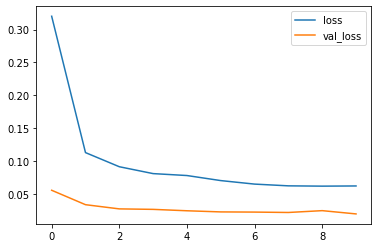

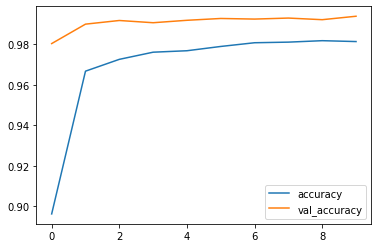

In [32]:
#evaluate model
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();